# Creating line graphs for my thesis
Thesis is available on [my github](https://github.com/JonasBingel/ThesisHSMZ-RLTicTacToe)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Parameters

In [2]:
# Paths
CSV_PATH = "Data"
OUTPUT_DIRECTORY = "Output"

# Import CSV

In [3]:
# Compare rate
data_compare_rate = pd.read_csv(Path(CSV_PATH, "compare_rate.csv"), sep=";", header=0, low_memory=False)

# Compare Alpha
data_alpha_QL = pd.read_csv(Path(CSV_PATH, "compare_alpha_QLearning.csv"), sep=";", header=0, low_memory=False)
data_alpha_QL_ALT = pd.read_csv(Path(CSV_PATH, "compare_alpha_QLearning_Alternate.csv"), sep=";", header=0, low_memory=False)

data_alpha_SARSA = pd.read_csv(Path(CSV_PATH, "compare_alpha_SARSA.csv"), sep=";", header=0, low_memory=False)
data_alpha_SARSA_ALT = pd.read_csv(Path(CSV_PATH, "compare_alpha_SARSA_Alternate.csv"), sep=";", header=0, low_memory=False)

#Compare Experience
data_experience_QL = pd.read_csv(Path(CSV_PATH, "compare_experience_QLearning.csv"), sep=";", header=0, low_memory=False)
data_experience_SARSA = pd.read_csv(Path(CSV_PATH, "compare_experience_SARSA.csv"), sep=";", header=0, low_memory=False)

# Compare Algorithm
data_algorithm = pd.read_csv(Path(CSV_PATH, "compare_algorithm_with_afterstates.csv"), sep=";", header=0, low_memory=False)


# Set Parameters for the Plot

In [4]:
PLOT_WIDTH = 12
PLOT_HEIGHT = 4
XLABEL = "Anzahl Trainingsepisoden"
YLABEL = "Rate optimaler Aktionen"
XTICKS = [20000 * n for n in range(0, 8)]
YTICKS = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
YTICK_LABELS = [str(n*10) + "%" for n in range(0, 11)]
XLIM = [0, 150000]
YLIM = [0.3, 1]

In [5]:
def generate_compare_rate_plot(data, isX):
    plottedSymbol = "X" if isX else "O"
    if (isX):
        subset_of_data = data[data.symbol != "SYMBOL_O"]
    else:
        subset_of_data = data[data.symbol != "SYMBOL_X"]
    
    ax = subset_of_data.plot(x="episode", y=["with_exploration", "without_exploration"], kind="line", figsize=(PLOT_WIDTH,PLOT_HEIGHT))
    ax.set(ylabel=YLABEL, xlabel=XLABEL)
    ax.set(xlim=XLIM, ylim=YLIM)
    ax.set(xticks=XTICKS, yticks=YTICKS)
    ax.set(yticklabels=YTICK_LABELS)
    ax.legend(["Rate inkl. explorativer Aktionen", "Rate exkl. explorativer Aktionen"], loc="lower right")

    filename = "compare_rate_{0}.pdf".format(plottedSymbol)
    ax.figure.savefig(Path(OUTPUT_DIRECTORY, filename), format="pdf", bbox_inches="tight", transparent=True, dpi=300)
    

def generate_compare_alpha_plot(data, isX, isQL, isAlternate):
    plottedSymbol = "X" if isX else "O"
    algorithm = "QLearning" if isQL else "SARSA"
    selfplay = "_ALTERNATE" if isAlternate else ""
    algorithmLegend = "Q-Learning" if isQL else "SARSA"
    
    if (isX):
        subset_of_data = data[data.symbol != "SYMBOL_O"]
    else:
        subset_of_data = data[data.symbol != "SYMBOL_X"]
    
    ax = subset_of_data.plot(x="episode", y=["rate_alpha01", "rate_alpha02", "rate_alphaDecay"], kind="line", figsize=(PLOT_WIDTH,PLOT_HEIGHT))
    ax.set(ylabel=YLABEL + ' Symbol {0}'.format(plottedSymbol), xlabel=XLABEL)
    ax.set(xlim=XLIM, ylim=YLIM)
    ax.set(xticks=XTICKS, yticks=YTICKS)
    ax.set(yticklabels=YTICK_LABELS)
    ax.legend([r'{0}: $\alpha$ = 0.1'.format(algorithmLegend), r'{0}: $\alpha$ = 0.2'.format(algorithmLegend), r'{0}: $\alpha$ = 1 $\rightarrow$ 0.1'.format(algorithmLegend)], loc="lower right")

    filename = "compare_alpha_{0}{1}_{2}.pdf".format(algorithm, selfplay, plottedSymbol)
    ax.figure.savefig(Path(OUTPUT_DIRECTORY, filename), format="pdf", bbox_inches="tight", transparent=True, dpi=300)
    
def generate_compare_experience_plot(data, isX, isQL):
    plottedSymbol = "X" if isX else "O"
    algorithm = "QLearning" if isQL else "SARSA"
    algorithmLegend = "Q-Learning" if isQL else "SARSA"
    
    if (isX):
        subset_of_data = data[data.symbol != "SYMBOL_O"]
    else:
        subset_of_data = data[data.symbol != "SYMBOL_X"]
    
    ax = subset_of_data.plot(x="episode", y=["rate_QTable", "rate_WTable"], kind="line", figsize=(PLOT_WIDTH,PLOT_HEIGHT))
    ax.set(ylabel=YLABEL + ' Symbol {0}'.format(plottedSymbol), xlabel=XLABEL)
    ax.set(xlim=XLIM, ylim=YLIM)
    ax.set(xticks=XTICKS, yticks=YTICKS)
    ax.set(yticklabels=YTICK_LABELS)
    ax.legend([r'{0}: Q-Table, $\alpha$ = 0.1'.format(algorithmLegend), r'{0}: W-Table, $\alpha$ = 0.1'.format(algorithmLegend)], loc="lower right")

    filename = "compare_experience_{0}_{1}.pdf".format(algorithm, plottedSymbol)
    ax.figure.savefig(Path(OUTPUT_DIRECTORY, filename), format="pdf", bbox_inches="tight", transparent=True, dpi=300)
    
def generate_compare_algorithm_plot(data, isX): 
    plottedSymbol = "X" if isX else "O"
    
    if (isX):
        subset_of_data = data[data.symbol != "SYMBOL_O"]
    else:
        subset_of_data = data[data.symbol != "SYMBOL_X"]
    
    ax = subset_of_data.plot(x="episode", y=["rate_QLearning", "rate_SARSA"], kind="line", figsize=(PLOT_WIDTH,PLOT_HEIGHT))
    ax.set(ylabel=YLABEL + ' Symbol {0}'.format(plottedSymbol), xlabel=XLABEL)
    ax.set(xlim=XLIM, ylim=YLIM)
    ax.set(xticks=XTICKS, yticks=YTICKS)
    ax.set(yticklabels=YTICK_LABELS)
    ax.legend([r'Q-Learning: W-Table, $\alpha$ = 0.1', r'SARSA: W-Table, $\alpha$ = 0.1'], loc="lower right")

    filename = "compare_algorithm_{0}.pdf".format(plottedSymbol)
    ax.figure.savefig(Path(OUTPUT_DIRECTORY, filename), format="pdf", bbox_inches="tight", transparent=True, dpi=300)                                        
    

# Call Functions to generate plots

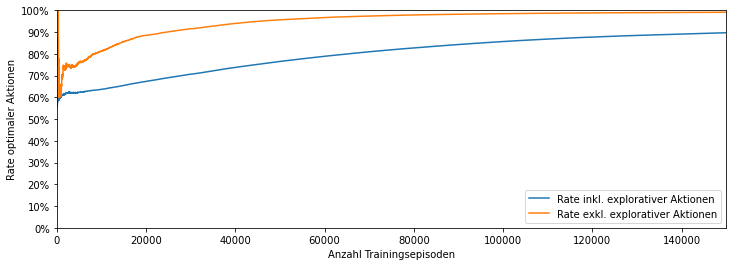

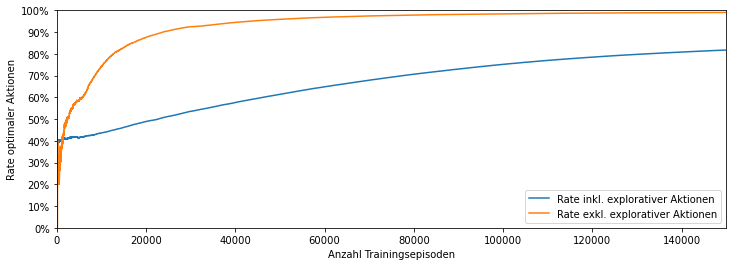

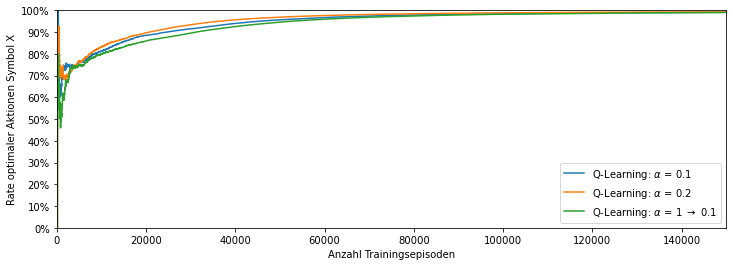

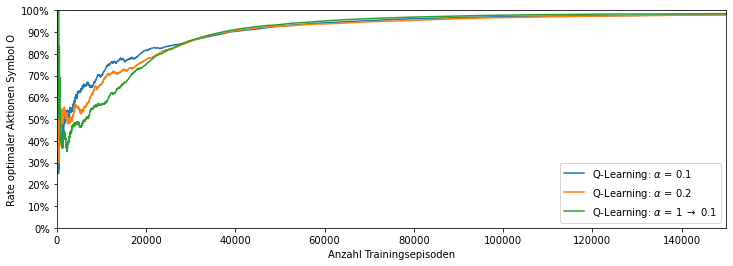

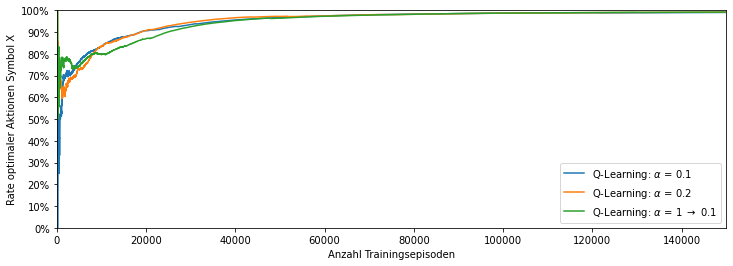

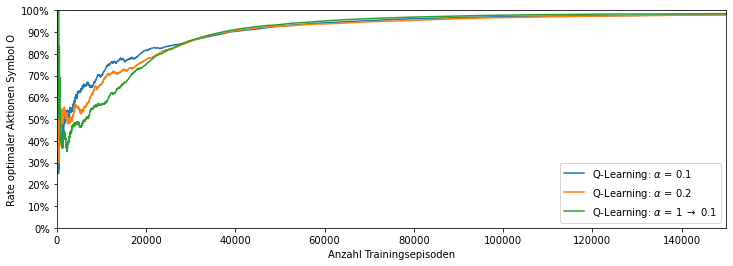

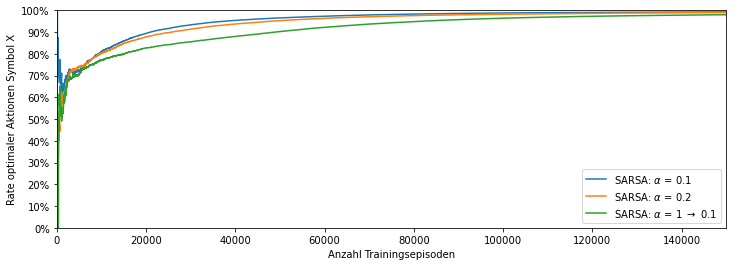

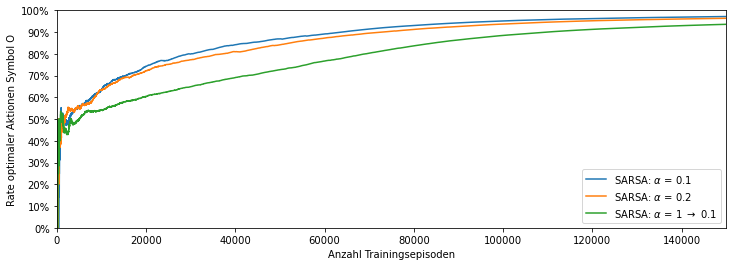

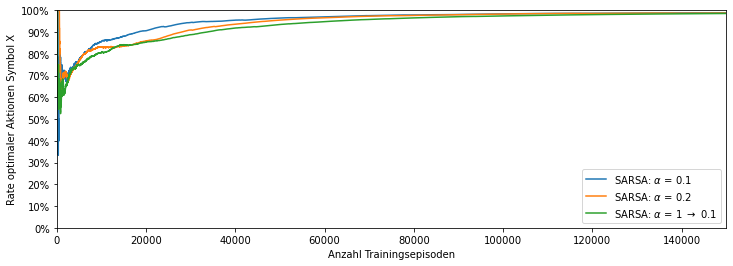

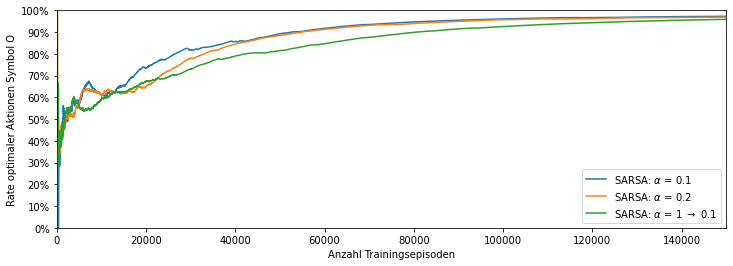

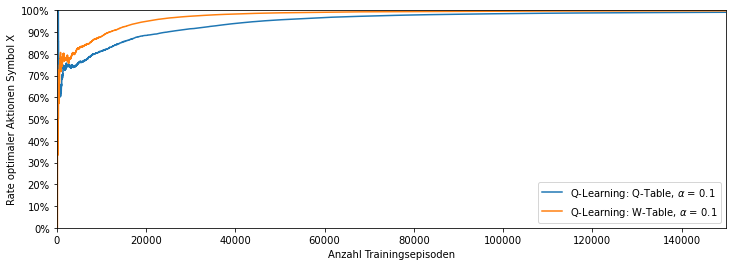

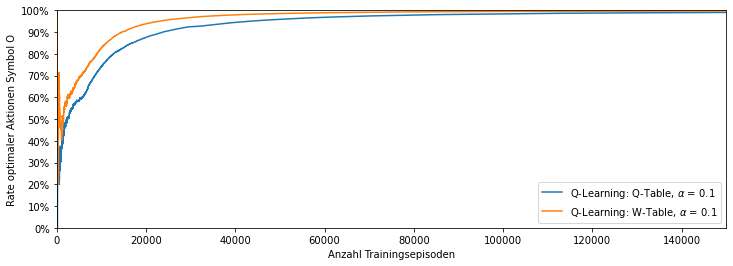

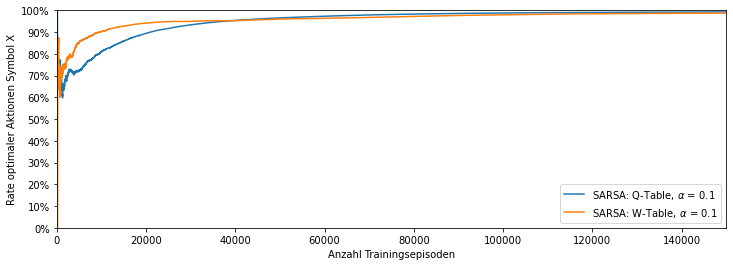

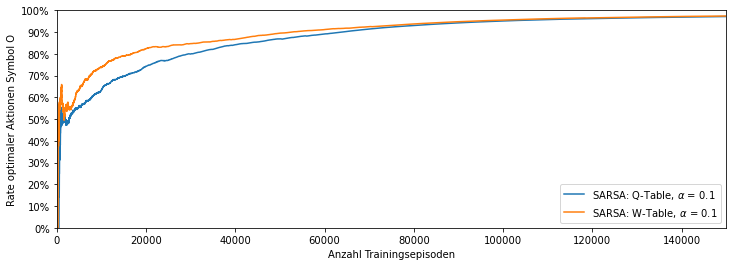

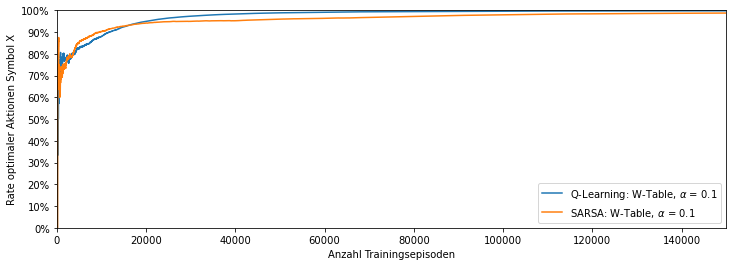

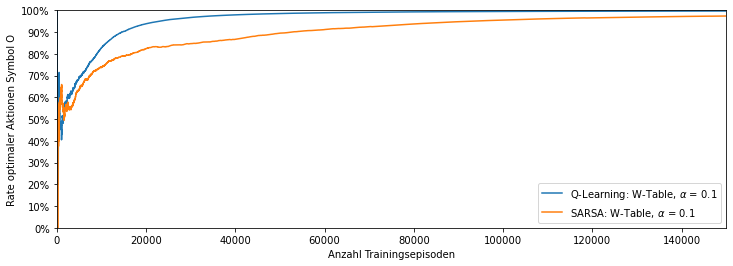

In [6]:
# Compare rate with and without explorative actions
generate_compare_rate_plot(data_compare_rate, True)
generate_compare_rate_plot(data_compare_rate, False)



# Compare Alpha plots Q-Learning normal self-play
generate_compare_alpha_plot(data_alpha_QL, True, True, False)
generate_compare_alpha_plot(data_alpha_QL_ALT, False, True, False)
# Compare Alpha plots Q-Learning alternating self-play
generate_compare_alpha_plot(data_alpha_QL_ALT, True, True, True)
generate_compare_alpha_plot(data_alpha_QL_ALT, False, True, True)

# Compare Alpha plots SARSA normal self-play
generate_compare_alpha_plot(data_alpha_SARSA, True, False, False)
generate_compare_alpha_plot(data_alpha_SARSA, False, False, False)
# Compare Alpha plots SARSA alternating self-play
generate_compare_alpha_plot(data_alpha_SARSA_ALT, True, False, True)
generate_compare_alpha_plot(data_alpha_SARSA_ALT, False, False, True)



# Compare Experience Plots for Q-Learning
generate_compare_experience_plot(data_experience_QL, True, True)
generate_compare_experience_plot(data_experience_QL, False, True)

# Compare Experience Plots for SARSA
generate_compare_experience_plot(data_experience_SARSA, True, False)
generate_compare_experience_plot(data_experience_SARSA, False, False)



# Compare Algorithm Plots
generate_compare_algorithm_plot(data_algorithm, True)
generate_compare_algorithm_plot(data_algorithm, False)

# Zip generated plots

In [7]:
!tar chvfz generated_plots.tar.gz ./Output

a ./Output
a ./Output/compare_algorithm_O.pdf
a ./Output/compare_algorithm_X.pdf
a ./Output/compare_alpha_QLearning_ALTERNATE_O.pdf
a ./Output/compare_alpha_QLearning_ALTERNATE_X.pdf
a ./Output/compare_alpha_QLearning_O.pdf
a ./Output/compare_alpha_QLearning_X.pdf
a ./Output/compare_alpha_SARSA_ALTERNATE_O.pdf
a ./Output/compare_alpha_SARSA_ALTERNATE_X.pdf
a ./Output/compare_alpha_SARSA_O.pdf
a ./Output/compare_alpha_SARSA_X.pdf
a ./Output/compare_experience_QLearning_O.pdf
a ./Output/compare_experience_QLearning_X.pdf
a ./Output/compare_experience_SARSA_O.pdf
a ./Output/compare_experience_SARSA_X.pdf
a ./Output/compare_rate_O.pdf
a ./Output/compare_rate_X.pdf
